<h1> <p style="text-decoration: underline;">A Exploratory Data Analysis of Best Las Vegas Best Restaurants</p></h1>

###### - Ashay Wanjarkar,

##### - 10 May 2020,

## <p style="text-decoration: underline;">Table of contents:</p><a class="anchor" id="first-bullet"></a>
    1. Introduction
    2. Data Preparation
    3. Data Analysis
        3.1 Map of all Las Vegas Restaurants
        3.2 Most Frequent restaurant categories
        3.2 Wordcloud of Top 20 most frequent word categories
        3.4 Bar Chart of Top 6 Frequent Cuisines
        3.5 Tables of Top 10 Restaurants By Star Rating For Each Cuisine
            3.5.1 Mexican Cuisine (Top 10 Star Ratings)
            3.5.2 American Cuisine (Top 10 Star Ratings)
            3.5.3 Chinese Cuisine (Top 10 Star Ratings)
            3.5.4 Italian Cuisine (Top 10 Star Ratings)
            3.5.5 Japanese Cuisine (Top 10 Star Ratings)
        3.6 Tables of Top 10 Restaurants By Review Count For Each Cuisine
            3.6.1 Mexican Cuisine (Top 10 Review Counts)
            3.6.2 American Cuisine (Top 10 Review Counts)
            3.6.3 Chinese Cuisine (Top 10 Review Counts)
            3.6.4 Italian Cuisine (Top 10 Review Counts)
            3.6.5 Japanese Cuisine (Top 10 Review Counts)
        3.7 Map of Top 10 Restaurants By Star Rating For Each Cuisine
            3.8 Map of Top 10 Restaurants By Review Count For Each Cuisine
            3.9 Map Comparing Top Restaurants By Star Rating Versus Review Count
    4. Conclusion

<h1><p style="text-decoration: underline;">1.Introduction :-</p></h1>

This is an preliminary Exploratory Data Analysis (EDA) of restaurants in Las Vegas using data provided by Yelp, specifically the yelp_business dataset. The aim is to pick apart the data, experiment, and use various forms of data visualization to better understand the food scene in Las Vegas. Furthermore, I am interested in finding which restaurants are, by different criteria, the “best” places to eat at in Las Vegas.

By exploring this data, I am trying to answer a couple of interesting questions like - 1. What is the distribution of Average Ratings like over-all? 2. Is there a correlation between the Price-Range that a restaurant falls under and it’s Average Rating? 3. Where are the maximum number of 5 star rated restaurants located (within the scope of our data-set)? 4. What are the top categories that most of the 5 star rated restaurants fall under?

A few questions based on the Yelp Reviews Dataset that this analysis attempts to answer (reviews limited to Restaurants in Pittsburgh) - 1. Can we show an interactive map of restaurants in Las Vegas with an indication of their Ratings? 2. What are the most frequently occuring phrases in reviews for highly rated restaurants and not-so highly rated restaurants. Is the difference apparent? 3. How do maximum number of ratings for a restaurant compare with the number of high Ratings? Are we making a wise choice by just looking at the Average rating or the number of Ratings? 4. Which neighborhoods house the maximum number of highly rated restaurants?

<h1><p style="text-decoration: underline;">2.Data Preparation :-</p></h1>

Lets start by importing data and getting a sense of yelp_business dataset.

In [2]:
import pandas as pd
business = pd.read_csv('D:/Data Science Capstone Project/Yelp_data/yelp_business.csv')

In [3]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   address       192609 non-null  object 
 1   name          192609 non-null  object 
 2   stars         192609 non-null  float64
 3   longitude     192609 non-null  float64
 4   postal_code   192609 non-null  object 
 5   business_id   192609 non-null  object 
 6   latitude      192609 non-null  float64
 7   review_count  192609 non-null  int64  
 8   categories    192127 non-null  object 
 9   city          192609 non-null  object 
 10  is_open       192609 non-null  int64  
 11  hours         147779 non-null  object 
 12  attributes    163773 non-null  object 
 13  state         192609 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


In [4]:
business.head()

,address,name,stars,longitude,postal_code,business_id,latitude,review_count,categories,city,is_open,hours,attributes,state
0,b'2818 E Camino Acequia Drive',b'Arizona Biltmore Golf Club',3.0,-112.018481,b'85016',b'1SWheh84yJXfytovILXOAQ',33.522143,5,"b'Golf, Active Life'",b'Phoenix',0,NaN,{'GoodForKids': 'False'},b'AZ'
1,b'30 Eglinton Avenue W',b'Emerald Chinese Restaurant',2.5,-79.652289,b'L5R 3E7',b'QXAEGFB4oINsVuTFxEYKFQ',43.605499,128,"b'Specialty Food, Restaurants, Dim Sum, Import...",b'Mississauga',1,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...","{'RestaurantsReservations': 'True', 'GoodForMe...",b'ON'
2,"b'10110 Johnston Rd, Ste 15'",b'Musashi Japanese Restaurant',4.0,-80.859132,b'28210',b'gnKjwL_1w79qoiV3IC_xQQ',35.092564,170,"b'Sushi Bars, Restaurants, Japanese'",b'Charlotte',1,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",b'NC'
3,"b'15655 W Roosevelt St, Ste 237'",b'Farmers Insurance - Paul Lorenz',5.0,-112.395596,b'85338',b'xvX2CttrVhyG2z1dFg_0xw',33.455613,3,"b'Insurance, Financial Services'",b'Goodyear',1,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",NaN,b'AZ'
4,"b'4209 Stuart Andrew Blvd, Ste F'",b'Queen City Plumbing',4.0,-80.887223,b'28217',b'HhyxOkGAM07SRYtlQ4wMFQ',35.190012,4,"b'Plumbing, Shopping, Local Services, Home Ser...",b'Charlotte',1,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",b'NC'


Now we will extract Las vegas business data from the above business dataframe. Also the dataframe contains columns which are not required in our review like postal code, business_id etc. and so we will drop them.

In [8]:
vegasbusiness = business[business.city=="b'Las Vegas'"]
vegasbusiness = vegasbusiness.drop(columns=['postal_code','business_id','hours','attributes','state'])

In [9]:
vegasbusiness.head(5)

,address,name,stars,longitude,latitude,review_count,categories,city,is_open
7,"b'4545 E Tropicana Rd Ste 8, Tropicana'",b'Supercuts',3.5,-115.074574,36.099872,3,"b""Hair Salons, Hair Stylists, Barbers, Men's H...",b'Las Vegas',1
17,"b'1775 E Tropicana Ave, Ste 29'","b""Carluccio's Tivoli Gardens""",4.0,-115.128528,36.100016,40,"b'Restaurants, Italian'",b'Las Vegas',0
18,b'',b'Myron Hensel Photography',5.0,-115.088115,36.116549,21,"b'Event Planning & Services, Photographers, Pr...",b'Las Vegas',1
20,"b'450 Fremont St, Ste 179'",b'Fremont Arcade',4.5,-115.140685,36.169993,38,"b'Arcades, Arts & Entertainment'",b'Las Vegas',1
22,b'6007 Dean Martin Dr',b'Hunk Mansion',4.0,-115.182756,36.080168,107,"b'Nightlife, Arts & Entertainment, Bars, Strip...",b'Las Vegas',1


In [16]:
vegasbusiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29370 entries, 7 to 192608
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       29370 non-null  object 
 1   name          29370 non-null  object 
 2   stars         29370 non-null  float64
 3   longitude     29370 non-null  float64
 4   latitude      29370 non-null  float64
 5   review_count  29370 non-null  int64  
 6   categories    29294 non-null  object 
 7   city          29370 non-null  object 
 8   is_open       29370 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.5+ MB


In [19]:
vegasfood = vegasbusiness[vegasbusiness['categories'].str.contains('Food|Restaurants',na=False)]
vegasfood.head()

,address,name,stars,longitude,latitude,review_count,categories,city,is_open
17,"b'1775 E Tropicana Ave, Ste 29'","b""Carluccio's Tivoli Gardens""",4.0,-115.128528,36.100016,40,"b'Restaurants, Italian'",b'Las Vegas',0
25,b'6055 E Lake Mead Blvd',"b""Maria's Mexican Restaurant & Bakery""",4.5,-115.040529,36.195615,184,"b'Mexican, Restaurants, Patisserie/Cake Shop, ...",b'Las Vegas',1
43,b'4190 N Pecos Rd',b'Three Square',5.0,-115.096454,36.236053,44,"b'Local Services, Food Banks, Community Servic...",b'Las Vegas',1
75,b'6125 Spring Mountain Rd',b'Dairy Queen',2.0,-115.225620,36.125031,33,"b'Fast Food, Food, Restaurants, Ice Cream & Fr...",b'Las Vegas',0
101,b'3650 E Flamingo Rd',b'All Star Donuts & Kolaches',4.0,-115.095457,36.115813,6,"b'Food, Donuts'",b'Las Vegas',0


In [22]:
vegasfood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8286 entries, 17 to 192598
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       8286 non-null   object 
 1   name          8286 non-null   object 
 2   stars         8286 non-null   float64
 3   longitude     8286 non-null   float64
 4   latitude      8286 non-null   float64
 5   review_count  8286 non-null   int64  
 6   categories    8286 non-null   object 
 7   city          8286 non-null   object 
 8   is_open       8286 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 647.3+ KB


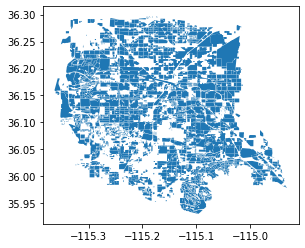

In [24]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point,Polygon

%matplotlib inline

landuse_map = gpd.read_file('D:/Data Science Capstone Project/Yelp_data/las vegas/planet_-115.307_35.981_f31e1b62-shp/shape/landuse.shp')
fig,ax = plt.subplots()
landuse_map.plot(ax=ax)
plt.rcParams['figure.figsize']=(15,15)

geometry = [Point(xy)for xy in zip(vegasfood["longitude"], vegasfood["latitude"])]
geometry[:3]
crs = 'epsg:4326'
geo_df = gpd.GeoDataFrame(vegasfood, #specify our data
                          crs=crs, #specify coordinate reference system
                          geometry=geometry)#specify geometry list we created


In [25]:
geo_df.head()

,address,name,stars,longitude,latitude,review_count,categories,city,is_open,geometry
17,"b'1775 E Tropicana Ave, Ste 29'","b""Carluccio's Tivoli Gardens""",4.0,-115.128528,36.100016,40,"b'Restaurants, Italian'",b'Las Vegas',0,POINT (-115.12853 36.10002)
25,b'6055 E Lake Mead Blvd',"b""Maria's Mexican Restaurant & Bakery""",4.5,-115.040529,36.195615,184,"b'Mexican, Restaurants, Patisserie/Cake Shop, ...",b'Las Vegas',1,POINT (-115.04053 36.19561)
43,b'4190 N Pecos Rd',b'Three Square',5.0,-115.096454,36.236053,44,"b'Local Services, Food Banks, Community Servic...",b'Las Vegas',1,POINT (-115.09645 36.23605)
75,b'6125 Spring Mountain Rd',b'Dairy Queen',2.0,-115.225620,36.125031,33,"b'Fast Food, Food, Restaurants, Ice Cream & Fr...",b'Las Vegas',0,POINT (-115.22562 36.12503)
101,b'3650 E Flamingo Rd',b'All Star Donuts & Kolaches',4.0,-115.095457,36.115813,6,"b'Food, Donuts'",b'Las Vegas',0,POINT (-115.09546 36.11581)


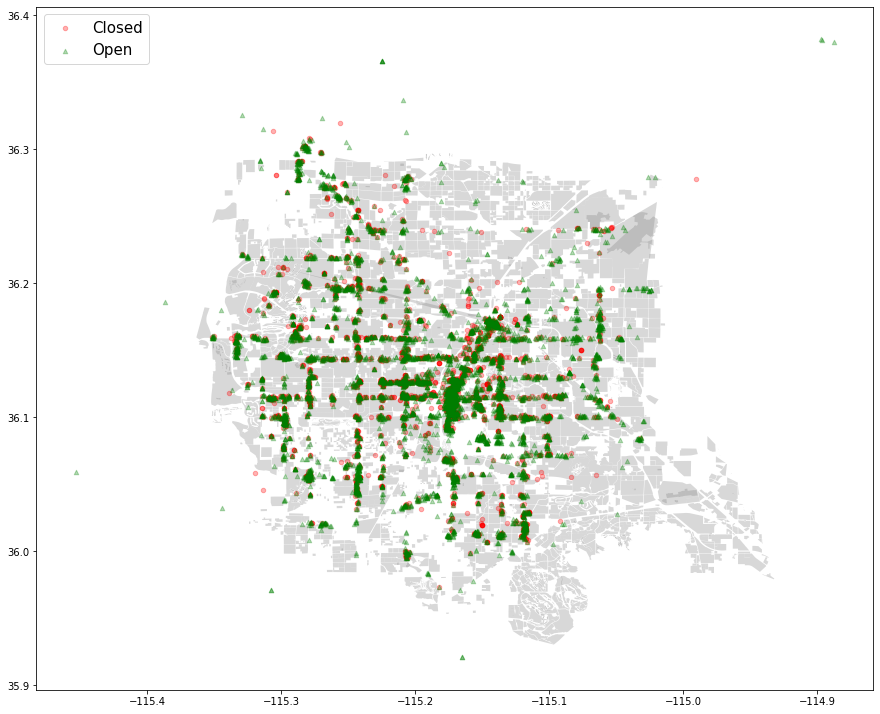

In [26]:
fig, ax = plt.subplots()
landuse_map.plot(ax=ax,alpha=0.3,color="grey")
geo_df[geo_df['is_open']==0].plot(ax=ax,markersize=20,color="red",marker="o",label="Closed",alpha=0.3)
geo_df[geo_df['is_open']==1].plot(ax=ax,markersize=20,color="green",marker="^",label="Open",alpha=0.3)
plt.legend(prop={'size':15})

We can observe the street layout of Las Vegas with all the restaurants lined out. Areas with many restaurants could also suggest it is a social hub of some kind and give a rough sense of where activity in the city is. As expected, restaurants are densely concentrated down a street in central Las Vegas where the famous Las Vegas strip is located.

In [28]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

vegas_food = vegasfood
vegas_food=vegas_food.drop(['geometry'],axis=1)
vegas_food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8286 entries, 17 to 192598
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       8286 non-null   object 
 1   name          8286 non-null   object 
 2   stars         8286 non-null   float64
 3   longitude     8286 non-null   float64
 4   latitude      8286 non-null   float64
 5   review_count  8286 non-null   int64  
 6   categories    8286 non-null   object 
 7   city          8286 non-null   object 
 8   is_open       8286 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 647.3+ KB


# 3.2 Most Frequent Restaurant Categories

Now we’ll explore more deeply into what kinds of food are predominant in Las Vegas. The Category variable can provide some valuable insight. Run a search through the Categories variable for the top 20 most frequently used word tags used to describe restaurants.

In [373]:
vegas_food.categories.head()

17                               b'Restaurants, Italian'
25     b'Mexican, Restaurants, Patisserie/Cake Shop, ...
43     b'Local Services, Food Banks, Community Servic...
75     b'Fast Food, Food, Restaurants, Ice Cream & Fr...
101                                      b'Food, Donuts'
Name: categories, dtype: object

In [52]:
#Convert byte literal to string
import ast
vegasfood.loc[:,'text_decode']= vegasfood.loc[:,'categories'].apply(lambda x: ast.literal_eval(x).decode("utf-8"))
vegasfood.text_decode.head()
vegas_food.loc[:,'text_decode']= vegas_food.loc[:,'categories'].apply(lambda x: ast.literal_eval(x).decode("utf-8"))
vegas_food.text_decode.head()

17                                  Restaurants, Italian
25     Mexican, Restaurants, Patisserie/Cake Shop, Fo...
43     Local Services, Food Banks, Community Service/...
75     Fast Food, Food, Restaurants, Ice Cream & Froz...
101                                         Food, Donuts
Name: text_decode, dtype: object

In [37]:
import numpy as np
keywords = []
for text in vegasfood.text_decode:
    words = text.split(", ")
    for word in words:
        keywords.append(word)

unique, counts = np.unique(np.array(keywords),return_counts=True)
keywords_dict= dict(zip(unique,counts))

def keyword_tuple(dictionary):
    return ((k,v) for k,v in dictionary.items())

keyword_df = pd.DataFrame(keyword_tuple(keywords_dict),columns=['word','counts']).sort_values('counts',ascending=False)
famous_food = pysqldf("SELECT * FROM keyword_df WHERE keyword_df.word IN('Mexican','American (Traditional)','Italian','American (New)','Chinese','Japanese');")
famous_food


,word,counts
0,American (Traditional),896
1,Mexican,827
2,American (New),677
3,Chinese,475
4,Italian,454
5,Japanese,392


In [38]:
keyword_df.head(10)

,word,counts
433,Restaurants,6450
206,Food,3594
350,Nightlife,1040
194,Fast Food,985
55,Bars,959
19,American (Traditional),896
329,Mexican,827
122,Coffee & Tea,766
437,Sandwiches,741
396,Pizza,686


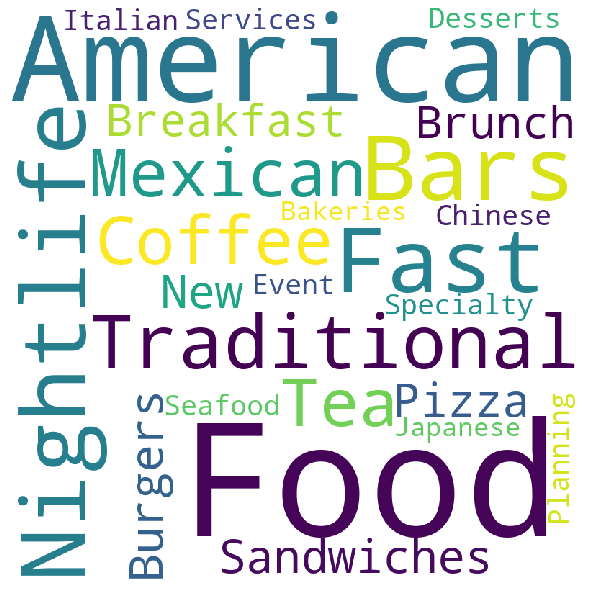

In [40]:
unwanted = ["Restaurants", "Food", "Shopping", "Specialty", "Grocery", "Convenience Stores", "event", "planning", "services", "new"]
new_keywords = [word for word in keyword_df.word if word not in unwanted]

plt_words = []
for i in range(0,21):
    plt_words.append(new_keywords[i])

from wordcloud import WordCloud
comment_words=''
comment_words += " ".join(plt_words)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                max_words = 25,
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

A glimpse of the wordcloud leads to the general observation that the Las Vegas food and social scene largely consists of nightlife, bars, and American food. Classics like pizza, burgers, and sandwiches dominate the space. Mexican food also seems to be a predominant theme. Analyzing word frequency in the context of a city space is interesting because it can also hint at what social activities and interests are popular.

# 3.4 Bar Chart of Top 6 Frequent Cuisines

The table and wordcloud show that the top 6 frequent cuisines in Las Vegas are Mexican, American (Traditional and New), Chinese, Italian, and Japanese. Extract these cuisines for further analysis. The bar chart below shows the number of times each cuisine has been included in restaurants’ categories.

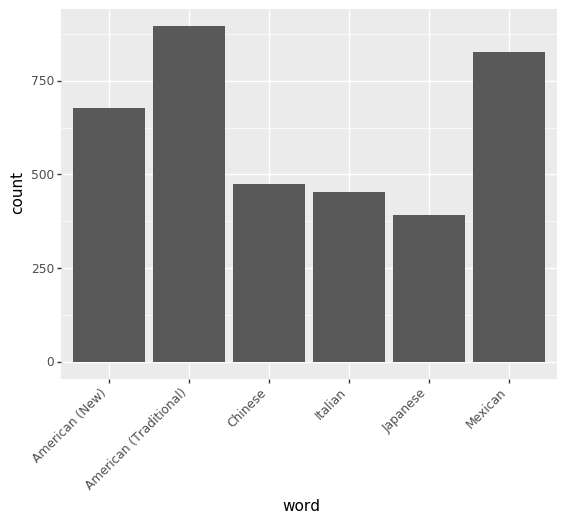

<ggplot: (-9223371848373508408)>

In [41]:
from plotnine import *
ggplot(famous_food,aes(x='word',weight='counts')) + \
    geom_bar()+theme(axis_text_x  = element_text(angle = 45, hjust = 1))

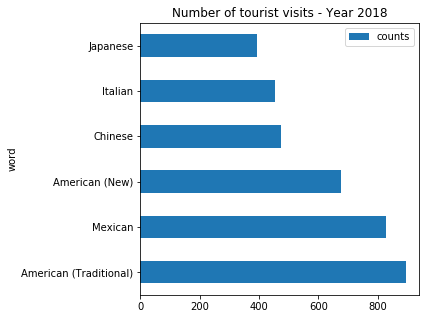

In [42]:
plt.rcParams['figure.figsize']=(5,5)
famous_food.plot.barh(x="word", y="counts", rot=360, title="Number of tourist visits - Year 2018");

# 3.5 Tables of Top 10 Restaurants By Star Rating For Each Cuisine

When it comes to determining the “best” restaurants, two common criteria are star ratings and review counts. The relationship between the two can be fickle. Popular restaurants with high review counts can sometimes experience lower star ratings due to the diverse customers that frequent it. For our analysis, we will start by finding the top 10 most highly star-rated restaurants for each top cuisine. Subset vegasfood into 5 datasets by cuisine. Note there are fewer American restaurants in this subset than the bar chart shows. This is because the bar chart double counted restaurants that may include both American cuisine tags.



In [53]:
vegas_food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8286 entries, 17 to 192598
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       8286 non-null   object 
 1   name          8286 non-null   object 
 2   stars         8286 non-null   float64
 3   longitude     8286 non-null   float64
 4   latitude      8286 non-null   float64
 5   review_count  8286 non-null   int64  
 6   categories    8286 non-null   object 
 7   city          8286 non-null   object 
 8   is_open       8286 non-null   int64  
 9   text_decode   8286 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 1.0+ MB


In [54]:
vegasamerican = pysqldf("SELECT * FROM vegas_food WHERE text_decode LIKE '%American%';")
vegasmexican = pysqldf("SELECT * FROM vegas_food WHERE text_decode LIKE '%Mexican%';")
vegasitalian = pysqldf("SELECT * FROM vegas_food WHERE text_decode LIKE '%Italian%';")
vegaschinese = pysqldf("SELECT * FROM vegas_food WHERE text_decode LIKE '%Chinese%';")
vegasjapanese = pysqldf("SELECT * FROM vegas_food WHERE text_decode LIKE '%Japanese%';")

# 3.5.1 Mexican Cuisine (Top 10 Star Ratings)

In [68]:
me_st=vegasmexican.sort_values('stars',ascending=False).head(10)
me_st

,address,name,stars,longitude,latitude,review_count,categories,city,is_open,text_decode
543,b'1468 E Charleston Blvd',b'Pos Paque Takos',5.0,-115.133053,36.158595,10,"b'Mexican, Food Trucks, Food, Restaurants'",b'Las Vegas',1,"Mexican, Food Trucks, Food, Restaurants"
493,b'',b'El Gallo de Sinaloa',5.0,-115.140000,36.180000,3,"b'Seafood, Street Vendors, Restaurants, Food, ...",b'Las Vegas',1,"Seafood, Street Vendors, Restaurants, Food, Me..."
806,b'3965 E Owens Ave',b'Taqueria El Pastorcito',5.0,-115.090129,36.187825,3,"b'Food, Restaurants, Mexican'",b'Las Vegas',1,"Food, Restaurants, Mexican"
24,b'3130 N Rainbow Blvd',b'Queen Tacos',5.0,-115.240862,36.216303,4,"b'Food Trucks, Mexican, Restaurants, Tacos, St...",b'Las Vegas',1,"Food Trucks, Mexican, Restaurants, Tacos, Stre..."
208,b'235 N Eastern Ave',b'Tortilleria San Diego',5.0,-115.116931,36.165574,5,"b'Mexican, Restaurants'",b'Las Vegas',1,"Mexican, Restaurants"
205,b'3930 Las Vegas Blvd',b'Husongs Cantina',5.0,-115.172986,36.086668,3,"b'Restaurants, Mexican'",b'Las Vegas',1,"Restaurants, Mexican"
84,"b'3250 N Tenaya Way, Ste 104'",b'La Cantine',5.0,-115.250697,36.219875,50,"b'Bakeries, Sandwiches, Vegan, Cafes, Fast Foo...",b'Las Vegas',1,"Bakeries, Sandwiches, Vegan, Cafes, Fast Food,..."
633,b'1436 E Charleston Blvd',b'Taqueria La Herradura',5.0,-115.134255,36.158640,14,"b'Mexican, Restaurants'",b'Las Vegas',1,"Mexican, Restaurants"
511,"b'5030 Paradise Rd, Ste B'",b'El Frescos Cocina Mexicana',5.0,-115.148446,36.098527,194,"b'Mexican, Event Planning & Services, Food, Re...",b'Las Vegas',0,"Mexican, Event Planning & Services, Food, Rest..."
81,"b'5115 Spring Mountain Rd, Ste 234'",b'Sin Citys Taco China',5.0,-115.211241,36.125537,16,"b'Restaurants, Tacos, Mexican'",b'Las Vegas',1,"Restaurants, Tacos, Mexican"


# 3.5.2 American Cuisine (Top 10 Star Ratings)

In [57]:
am_st=vegasamerican.sort_values('stars',ascending=False).head(10)
am_st

,address,name,stars,longitude,latitude,review_count,categories,city,is_open,text_decode
1247,"b'3743 South Las Vegas Blvd, Ste 120'",b'Chew & Chug',5.0,-115.172149,36.106773,44,"b'Restaurants, Fast Food, American (New)'",b'Las Vegas',1,"Restaurants, Fast Food, American (New)"
252,"b'6070 S Rainbow Blvd, Ste 7'",b'Pie Me Over',5.0,-115.241801,36.078686,123,"b'Food, Restaurants, American (Traditional), D...",b'Las Vegas',0,"Food, Restaurants, American (Traditional), Des..."
722,b'6101 Vegs Dr',b'Dem Noles Bois',5.0,-115.222517,36.188212,3,"b'Seafood, Chinese, Pizza, American (Tradition...",b'Las Vegas',0,"Seafood, Chinese, Pizza, American (Traditional..."
451,"b'7875 W Sahara Ave, Ste 103'","b""Fido's Kitchen""",5.0,-115.262866,36.143172,27,"b'Food Delivery Services, American (New), Pet ...",b'Las Vegas',1,"Food Delivery Services, American (New), Pet Se..."
41,b'420 E Pilot Rd',"b""Sticky Iggy's""",5.0,-115.153928,36.068215,18,"b'Food Trucks, Restaurants, Waffles, Event Pla...",b'Las Vegas',1,"Food Trucks, Restaurants, Waffles, Event Plann..."
42,"b'3369 Thom Blvd, rose grilled'",b'Those Guys Pies',5.0,-115.212351,36.220039,5,"b'Pizza, Restaurants, Sandwiches, American (Ne...",b'Las Vegas',0,"Pizza, Restaurants, Sandwiches, American (New)..."
806,"b'3375 S Decatur Blvd, Suit 9'",b'El carbonero restaurant and pupuseria',5.0,-115.209017,36.128744,3,"b'Salvadoran, Latin American, Restaurants'",b'Las Vegas',1,"Salvadoran, Latin American, Restaurants"
702,"b'2550 Chandler Ave, Ste 34'",b'Rocket Man BBQ & Catering',5.0,-115.113814,36.074667,3,"b'Street Vendors, Event Planning & Services, R...",b'Las Vegas',1,"Street Vendors, Event Planning & Services, Res..."
1006,"b'953 E Sahara Ave, Ste E8'",b'Sausagefest',5.0,-115.142496,36.142523,118,"b'Breakfast & Brunch, Restaurants, American (N...",b'Las Vegas',1,"Breakfast & Brunch, Restaurants, American (New..."
822,b'4875 West Oakey Blvd',b'Cactus Cafe',5.0,-115.205371,36.151762,10,"b'American (Traditional), Persian/Iranian, Res...",b'Las Vegas',1,"American (Traditional), Persian/Iranian, Resta..."


# 3.5.3 Chinese Cuisine (Top 10 Star Ratings)

In [58]:
ch_st = vegaschinese.sort_values('stars',ascending=False).head(10)
ch_st

,address,name,stars,longitude,latitude,review_count,categories,city,is_open,text_decode
138,"b'4825 S Rainbow Blvd, Ste 205'",b'Yummy Chinese restaurant',5.0,-115.244597,36.100877,8,"b'Restaurants, Chinese'",b'Las Vegas',1,"Restaurants, Chinese"
76,"b'2797 S Maryland Pkwy, Ste 30'",b'Gourmet China II',5.0,-115.137928,36.138845,24,"b'Szechuan, Restaurants, Chinese, Seafood, Veg...",b'Las Vegas',1,"Szechuan, Restaurants, Chinese, Seafood, Veget..."
242,b'6101 Vegs Dr',b'Dem Noles Bois',5.0,-115.222517,36.188212,3,"b'Seafood, Chinese, Pizza, American (Tradition...",b'Las Vegas',0,"Seafood, Chinese, Pizza, American (Traditional..."
66,b'4983 W Flamingo Rd',b'Winter In July - A Pop-Up Lunch with Yonaka ...,5.0,-115.209744,36.114905,7,"b'Chinese, Local Flavor, Japanese, Restaurants'",b'Las Vegas',0,"Chinese, Local Flavor, Japanese, Restaurants"
316,"b'3708 S Las Vegas Blvd, Level 3'",b'Red Plate',5.0,-115.175391,36.109946,4,"b'Restaurants, Chinese'",b'Las Vegas',1,"Restaurants, Chinese"
91,b'2775 S Nellis Blvd',b'China Passion',4.5,-115.066970,36.139118,124,"b'Food Delivery Services, Food, Soup, Chinese,...",b'Las Vegas',1,"Food Delivery Services, Food, Soup, Chinese, R..."
155,"b'4860 W Desert Inn Rd, Ste 9'",b'Cheerful House Chinese Cuisine',4.5,-115.207305,36.131716,97,"b'Chinese, Food, Juice Bars & Smoothies, Resta...",b'Las Vegas',0,"Chinese, Food, Juice Bars & Smoothies, Restaur..."
161,"b'4983 W Flamingo Rd, Ste B'",b'Shang Artisan Noodle',4.5,-115.209711,36.114869,1052,"b'Restaurants, Noodles, Asian Fusion, Chinese,...",b'Las Vegas',1,"Restaurants, Noodles, Asian Fusion, Chinese, Soup"
260,b'4503 Paradise Rd',b'Stir Krazy Mongolian Grill',4.5,-115.152105,36.107194,57,"b'Asian Fusion, Restaurants, Chinese, Barbeque'",b'Las Vegas',0,"Asian Fusion, Restaurants, Chinese, Barbeque"
326,b'380 W Sahara Ave',b'Flock & Fowl',4.5,-115.162692,36.144296,403,"b'Chicken Shop, Singaporean, Asian Fusion, Res...",b'Las Vegas',0,"Chicken Shop, Singaporean, Asian Fusion, Resta..."


# 3.5.3 Italian Cuisine (Top 10 Star Ratings)

In [59]:
it_st=vegasitalian.sort_values('stars',ascending=False).head(10)
it_st

,address,name,stars,longitude,latitude,review_count,categories,city,is_open,text_decode
381,"b'6370 W Flamingo Rd, Ste 30'",b'Aroma Cuisine of the World/Oscar Catering',5.0,-115.232014,36.115157,34,"b'Spanish, Restaurants, Sandwiches, Juice Bars...",b'Las Vegas',0,"Spanish, Restaurants, Sandwiches, Juice Bars &..."
145,"b'6020 W Flamingo Rd, Ste 10'",b'Pizzeria Monz\xc3\xba',5.0,-115.223600,36.115110,157,"b'Italian, Pizza, Restaurants, Breakfast & Bru...",b'Las Vegas',1,"Italian, Pizza, Restaurants, Breakfast & Brunch"
88,"b'7750 S Jones Blvd, Ste 103'","b""Arnie's Pizzeria""",5.0,-115.224346,36.048486,28,"b'Restaurants, Burgers, Pizza, Italian'",b'Las Vegas',1,"Restaurants, Burgers, Pizza, Italian"
177,b'1955 E Tropicana Ave',b'Pasta Mia East',5.0,-115.126255,36.100365,12,"b'Restaurants, Italian'",b'Las Vegas',1,"Restaurants, Italian"
393,"b'4555 S Fort Apache Rd, Ste 112'",b'Pizza Gourmet',5.0,-115.298020,36.106433,13,"b'Restaurants, Italian, Pizza'",b'Las Vegas',0,"Restaurants, Italian, Pizza"
406,b'9500 W Sahara Ave',"b""Bertolini's Authentic Trattoria""",5.0,-115.301818,36.144950,5,"b'Italian, Restaurants'",b'Las Vegas',0,"Italian, Restaurants"
168,b'3441 W Sahara Ave Ste B2',"b""Montesano's Italian Deli""",5.0,-115.187386,36.143294,4,"b'Italian, Delis, Restaurants'",b'Las Vegas',0,"Italian, Delis, Restaurants"
287,"b'840 S Rancho Dr, Ste 16'",b'New York Bagel N Bakery',5.0,-115.173214,36.161705,35,"b'Italian, Bakeries, Bagels, Restaurants, Deli...",b'Las Vegas',1,"Italian, Bakeries, Bagels, Restaurants, Delis,..."
313,"b'953 E Sahara Ave, Ste E8'",b'Sausagefest',5.0,-115.142496,36.142523,118,"b'Breakfast & Brunch, Restaurants, American (N...",b'Las Vegas',1,"Breakfast & Brunch, Restaurants, American (New..."
147,b'3759 E Desert Inn Rd',b'Los Olivos Ristorante',5.0,-115.092483,36.129178,102,"b'Restaurants, Italian'",b'Las Vegas',1,"Restaurants, Italian"


# 3.5.3 Japanese Cuisine (Top 10 Star Ratings)

In [60]:
ja_st=vegasjapanese.sort_values('stars',ascending=False).head(10)
ja_st

,address,name,stars,longitude,latitude,review_count,categories,city,is_open,text_decode
0,"b'The Palazzo Hotel, 3325 Las Vegas Blvd S'",b'Bar Charlie',5.0,-115.146372,36.124423,14,"b'Japanese, Restaurants'",b'Las Vegas',0,"Japanese, Restaurants"
48,b'4790 S Ft. Apache Rd',b'Sushi House Manda',5.0,-115.296532,36.102015,4,"b'Restaurants, Japanese'",b'Las Vegas',0,"Restaurants, Japanese"
159,b'3000 Paradise Rd',b'Bar Sake & Robata Grill',5.0,-115.151254,36.136261,6,"b'Sushi Bars, Nightlife, Cocktail Bars, Bars, ...",b'Las Vegas',1,"Sushi Bars, Nightlife, Cocktail Bars, Bars, Ja..."
45,b'4983 W Flamingo Rd',b'Winter In July - A Pop-Up Lunch with Yonaka ...,5.0,-115.209744,36.114905,7,"b'Chinese, Local Flavor, Japanese, Restaurants'",b'Las Vegas',0,"Chinese, Local Flavor, Japanese, Restaurants"
97,b'4459 W Flamingo Rd',b'J Sake Bar',5.0,-115.201450,36.114876,6,"b'Japanese, Bars, Nightlife, Restaurants'",b'Las Vegas',0,"Japanese, Bars, Nightlife, Restaurants"
254,b'5020 Spring Mountain Rd',"b""Tetsuro's Sayonara, Aloha, Going Away Uye At...",5.0,-115.209374,36.126834,5,"b'Japanese, Restaurants'",b'Las Vegas',0,"Japanese, Restaurants"
371,b'4747 S Maryland Pkwy',b'Poke Heaven',5.0,-115.137631,36.104162,112,"b'Poke, Korean, Asian Fusion, Japanese, Hawaii...",b'Las Vegas',1,"Poke, Korean, Asian Fusion, Japanese, Hawaiian..."
266,b'3333 Blue Diamond Rd',b'Su Casa',5.0,-115.183922,36.041727,5,"b'Restaurants, Japanese, Sushi Bars'",b'Las Vegas',1,"Restaurants, Japanese, Sushi Bars"
375,"b'3655 S Durango Dr, Ste 9'",b'Ichi Belle',5.0,-115.279925,36.123041,4,"b'Restaurants, Japanese, Event Planning & Serv...",b'Las Vegas',1,"Restaurants, Japanese, Event Planning & Servic..."
172,"b'7331 W Lake Mead Blvd, Ste 104'",b'Kame Omakase',5.0,-115.252472,36.194769,164,"b'Seafood, Japanese, Restaurants, Sushi Bars'",b'Las Vegas',1,"Seafood, Japanese, Restaurants, Sushi Bars"


# 3.6 Tables of Top 10 Restaurants By Review Count For Each Cuisine

The same process is applied to the top 10 restaurants defined by review counts. Sort each cuisine dataset in decreasing order of review count and extract the top 10 restaurants.

## 3.6.1 American Cuisine (Top 10 Review Counts)

In [61]:
am_re=vegasamerican.sort_values('review_count',ascending=False).head(10)
am_re

,address,name,stars,longitude,latitude,review_count,categories,city,is_open,text_decode
465,b'3535 Las Vegas Blvd',b'Hash House A Go Go',4.0,-115.171580,36.118181,5763,"b'Breakfast & Brunch, Food, Restaurants, Ameri...",b'Las Vegas',1,"Breakfast & Brunch, Food, Restaurants, America..."
1069,b'3667 Las Vegas Blvd S',b'Gordon Ramsay BurGR',4.0,-115.172169,36.110724,5484,"b'Restaurants, Burgers, American (Traditional)'",b'Las Vegas',0,"Restaurants, Burgers, American (Traditional)"
646,b'3667 Las Vegas Blvd S',b'Earl of Sandwich',4.5,-115.171874,36.109418,5075,"b'Food Delivery Services, Salad, Sandwiches, S...",b'Las Vegas',1,"Food Delivery Services, Salad, Sandwiches, Sou..."
11,b'3600 S Las Vegas Blvd',b'The Buffet at Bellagio',3.5,-115.176890,36.113220,4227,"b'American (New), Buffets, Restaurants'",b'Las Vegas',1,"American (New), Buffets, Restaurants"
956,"b'Caesars Palace Las Vegas Hotel And Casino, 3...",b'Serendipity 3',3.0,-115.173317,36.115670,3929,"b'Juice Bars & Smoothies, Social Clubs, Arts &...",b'Las Vegas',0,"Juice Bars & Smoothies, Social Clubs, Arts & E..."
152,b'3355 Las Vegas Blvd S',b'Yardbird Southern Table & Bar',4.5,-115.170112,36.122328,3576,"b'Restaurants, American (New), Southern'",b'Las Vegas',1,"Restaurants, American (New), Southern"
911,b'3655 Las Vegas Blvd S',b'Gordon Ramsay Steak',4.0,-115.171696,36.112338,3547,"b'Steakhouses, Restaurants, Soup, Salad, Ameri...",b'Las Vegas',1,"Steakhouses, Restaurants, Soup, Salad, America..."
1004,"b'470 E Windmill Ln, Ste 100'",b'Bachi Burger',4.0,-115.153018,36.042631,3333,"b'Bars, American (New), Burgers, Asian Fusion,...",b'Las Vegas',1,"Bars, American (New), Burgers, Asian Fusion, F..."
1429,"b'4533 W Sahara Ave, Ste 5'",b'Egg & I',4.5,-115.202486,36.144085,3300,"b'Breakfast & Brunch, Sandwiches, Burgers, Res...",b'Las Vegas',1,"Breakfast & Brunch, Sandwiches, Burgers, Resta..."
978,b'6800 W Sahara Ave',b'Hash House A Go Go',4.0,-115.240092,36.144713,3292,"b'American (New), Breakfast & Brunch, Restaura...",b'Las Vegas',1,"American (New), Breakfast & Brunch, Restaurants"


# 3.6.2 Mexican Cuisine (Top 10 Review Counts)

In [62]:
me_re=vegasmexican.sort_values('review_count',ascending=False).head(10)
me_re

,address,name,stars,longitude,latitude,review_count,categories,city,is_open,text_decode
232,b'3570 Las Vegas Blvd S',b'Mesa Grill',4.0,-115.174793,36.117125,3268,"b'American (Traditional), Restaurants, Mexican...",b'Las Vegas',1,"American (Traditional), Restaurants, Mexican, ..."
316,b'3049 S Las Vegas Blvd',b'Tacos El Gordo',4.0,-115.164767,36.131594,3243,"b'Mexican, Tacos, Restaurants'",b'Las Vegas',1,"Mexican, Tacos, Restaurants"
611,b'3025 Sammy Davis Jr Dr',b'El Dorado Cantina',4.5,-115.175822,36.134915,2623,"b'Mexican, Lounges, Restaurants, Nightlife, Bars'",b'Las Vegas',1,"Mexican, Lounges, Restaurants, Nightlife, Bars"
262,"b'3663 Las Vegas Blvd, Ste 595'",b'Nacho Daddy',4.5,-115.171111,36.108086,2400,"b'Restaurants, Mexican, Tex-Mex, Vegan, Americ...",b'Las Vegas',1,"Restaurants, Mexican, Tex-Mex, Vegan, American..."
52,"b'9640 W Tropicana, Ste 101'","b""Juan's Flaming Fajitas & Cantina""",4.5,-115.302689,36.100509,1624,"b'Nightlife, Restaurants, Bars, Mexican'",b'Las Vegas',1,"Nightlife, Restaurants, Bars, Mexican"
94,b'3950 S Las Vegas Blvd',b'Border Grill',4.0,-115.176973,36.090067,1623,"b'Breakfast & Brunch, Restaurants, Tapas/Small...",b'Las Vegas',1,"Breakfast & Brunch, Restaurants, Tapas/Small P..."
458,"b'3708 Las Vegas Blvd S, Level 2, Boulevard To...",b'China Poblano',3.5,-115.175391,36.109946,1620,"b'Mexican, Chinese, Asian Fusion, Restaurants'",b'Las Vegas',1,"Mexican, Chinese, Asian Fusion, Restaurants"
541,b'1724 E Charleston Blvd',b'Tacos El Gordo',4.0,-115.126550,36.158475,1579,"b'Restaurants, Mexican, Tacos'",b'Las Vegas',1,"Restaurants, Mexican, Tacos"
819,b'3545 S Las Vegas Blvd',b'Chayo Mexican Kitchen + Tequila Bar',3.5,-115.171714,36.117735,1487,"b'Nightlife, Breakfast & Brunch, Restaurants, ...",b'Las Vegas',1,"Nightlife, Breakfast & Brunch, Restaurants, Me..."
286,b'113 N 4th St',b'Nacho Daddy Downtown',4.0,-115.141611,36.170307,1445,"b'Tex-Mex, Restaurants, American (New), Mexica...",b'Las Vegas',1,"Tex-Mex, Restaurants, American (New), Mexican,..."


# 3.6.3 Chinese Cuisine (Top 10 Review Counts)

In [63]:
ch_re=vegaschinese.sort_values('review_count',ascending=False).head(10)
ch_re

,address,name,stars,longitude,latitude,review_count,categories,city,is_open,text_decode
353,b'4029 Spring Mountain Rd',b'Pho Kim Long',3.5,-115.193445,36.126194,3013,"b'Vietnamese, Restaurants, Chinese, Korean'",b'Las Vegas',1,"Vietnamese, Restaurants, Chinese, Korean"
23,b'3327 Las Vegas Blvd S',b'SUSHISAMBA - Las Vegas',4.0,-115.167553,36.124582,2355,"b'Bars, Dim Sum, Japanese, Asian Fusion, Resta...",b'Las Vegas',1,"Bars, Dim Sum, Japanese, Asian Fusion, Restaur..."
81,"b'Mgm Grand Hotel And Casino, 3799 Las Vegas B...",b'Hakkasan Nightclub',2.5,-115.172452,36.101375,1791,"b'Nightlife, Chinese, Lounges, Cantonese, Bars...",b'Las Vegas',1,"Nightlife, Chinese, Lounges, Cantonese, Bars, ..."
258,"b'3708 Las Vegas Blvd S, Level 2, Boulevard To...",b'China Poblano',3.5,-115.175391,36.109946,1620,"b'Mexican, Chinese, Asian Fusion, Restaurants'",b'Las Vegas',1,"Mexican, Chinese, Asian Fusion, Restaurants"
6,b'3355 Las Vegas Blvd S',b'Noodle Asia',3.5,-115.170163,36.122689,1090,"b'Restaurants, Asian Fusion, Chinese, Dim Sum,...",b'Las Vegas',1,"Restaurants, Asian Fusion, Chinese, Dim Sum, N..."
161,"b'4983 W Flamingo Rd, Ste B'",b'Shang Artisan Noodle',4.5,-115.209711,36.114869,1052,"b'Restaurants, Noodles, Asian Fusion, Chinese,...",b'Las Vegas',1,"Restaurants, Noodles, Asian Fusion, Chinese, Soup"
232,b'3600 S Las Vegas Blvd',b'Noodles',3.0,-115.176301,36.112269,1017,"b'Restaurants, Korean, Asian Fusion, Dim Sum, ...",b'Las Vegas',1,"Restaurants, Korean, Asian Fusion, Dim Sum, Ch..."
32,b'4000 W Flamingo Rd',b'Ping Pang Pong',3.5,-115.193512,36.116901,1005,"b'Cantonese, Seafood, Dim Sum, Restaurants, Ch...",b'Las Vegas',1,"Cantonese, Seafood, Dim Sum, Restaurants, Chinese"
360,"b'3400 S Jones Blvd, Ste 15'",b'Chubby Cattle',4.5,-115.224069,36.127397,1000,"b'Mongolian, Food, Chinese, Restaurants, Hot P...",b'Las Vegas',1,"Mongolian, Food, Chinese, Restaurants, Hot Pot..."
190,"b'5115 Spring Mountain Rd, Ste 203'",b'Veggie House',4.5,-115.210911,36.125569,993,"b'Chinese, Restaurants, Vegetarian, Specialty ...",b'Las Vegas',1,"Chinese, Restaurants, Vegetarian, Specialty Fo..."


# 3.6.4 Italian Cuisine (Top 10 Review Counts)

In [64]:
it_re=vegasitalian.sort_values('review_count',ascending=False).head(10)
it_re

,address,name,stars,longitude,latitude,review_count,categories,city,is_open,text_decode
209,"b'The Cromwell Las Vegas Resort & Casino, 3595...",b'Giada',3.5,-115.172109,36.115059,2884,"b'Italian, Restaurants'",b'Las Vegas',1,"Italian, Restaurants"
132,b'3355 Las Vegas Blvd S',b'Grand Lux Cafe',4.0,-115.168855,36.121822,2767,"b'American (New), Food, American (Traditional)...",b'Las Vegas',1,"American (New), Food, American (Traditional), ..."
354,b'2880 S Las Vegas Blvd',b'Circus Circus Las Vegas Hotel and Casino',2.5,-115.165386,36.137642,2587,"b'Arts & Entertainment, Event Planning & Servi...",b'Las Vegas',1,"Arts & Entertainment, Event Planning & Service..."
96,b'3600 S Las Vegas Blvd',b'Olives',4.0,-115.174139,36.113933,1783,"b'American (New), Bars, Nightlife, Italian, Me...",b'Las Vegas',0,"American (New), Bars, Nightlife, Italian, Medi..."
238,b'3327 S Las Vegas Blvd',"b""Buddy V's Ristorante""",4.0,-115.170188,36.123406,1662,"b'American (Traditional), Restaurants, Italian'",b'Las Vegas',1,"American (Traditional), Restaurants, Italian"
106,"b'The Palazzo, 3255 S Las Vegas Blvd'",b'LAVO Italian Restaurant & Lounge',3.5,-115.169069,36.124434,1653,"b'Nightlife, Restaurants, Dance Clubs, Bars, M...",b'Las Vegas',1,"Nightlife, Restaurants, Dance Clubs, Bars, Med..."
114,b'5780 W Flamingo Rd',"b""Nora's Italian Cuisine""",4.0,-115.220284,36.115052,1506,"b'Caterers, Nightlife, Bars, Wine Bars, Venues...",b'Las Vegas',1,"Caterers, Nightlife, Bars, Wine Bars, Venues &..."
208,b'3200 Las Vegas Blvd S',"b""Maggiano's Little Italy""",4.0,-115.168968,36.127783,1476,"b'Restaurants, Italian, Bars, Nightlife'",b'Las Vegas',1,"Restaurants, Italian, Bars, Nightlife"
301,b'3713 W Sahara Ave',b'Herbs & Rye',4.0,-115.191727,36.143924,1461,"b'Lounges, Bars, Food, Italian, Steakhouses, R...",b'Las Vegas',1,"Lounges, Bars, Food, Italian, Steakhouses, Res..."
333,b'3325 Las Vegas Blvd S',b'Carnevino',3.5,-115.168655,36.124844,1367,"b'Nightlife, Wine Bars, Bars, Italian, Restaur...",b'Las Vegas',0,"Nightlife, Wine Bars, Bars, Italian, Restauran..."


# 3.6.5 Japanese Cuisine (Top 10 Review Counts)

In [65]:
ja_re=vegasjapanese.sort_values('review_count',ascending=False).head(10)
ja_re

,address,name,stars,longitude,latitude,review_count,categories,city,is_open,text_decode
232,"b'4480 Paradise Rd, Ste 600'",b'Gangnam Asian BBQ Dining',4.5,-115.151261,36.108898,3449,"b'Barbeque, Korean, Asian Fusion, Tapas/Small ...",b'Las Vegas',1,"Barbeque, Korean, Asian Fusion, Tapas/Small Pl..."
53,"b'5030 Spring Mountain Rd, Ste 6'",b'Monta Ramen',4.0,-115.209819,36.127034,2604,"b'Noodles, Ramen, Restaurants, Japanese'",b'Las Vegas',1,"Noodles, Ramen, Restaurants, Japanese"
16,b'3327 Las Vegas Blvd S',b'SUSHISAMBA - Las Vegas',4.0,-115.167553,36.124582,2355,"b'Bars, Dim Sum, Japanese, Asian Fusion, Resta...",b'Las Vegas',1,"Bars, Dim Sum, Japanese, Asian Fusion, Restaur..."
113,"b'1350 E Flamingo Rd, Ste 18'",b'Yama Sushi',4.0,-115.134971,36.115520,1912,"b'Sushi Bars, Restaurants, Japanese'",b'Las Vegas',1,"Sushi Bars, Restaurants, Japanese"
44,"b'5255 S Decatur Blvd, Ste 118-119'",b'Sushi House Goyemon',3.5,-115.208867,36.094457,1799,"b'Restaurants, Sushi Bars, Japanese'",b'Las Vegas',1,"Restaurants, Sushi Bars, Japanese"
370,b'3949 S Maryland Pkwy',b'Sakana',4.5,-115.138437,36.117151,1659,"b'Buffets, Sushi Bars, Japanese, Restaurants'",b'Las Vegas',1,"Buffets, Sushi Bars, Japanese, Restaurants"
228,"b'The Venetian, 3355 S Las Vegas Blvd'",b'TAO Asian Bistro',3.5,-115.170196,36.122655,1563,"b'Nightlife, Japanese, Asian Fusion, Lounges, ...",b'Las Vegas',1,"Nightlife, Japanese, Asian Fusion, Lounges, Ba..."
58,b'4860 W Flamingo Rd',b'JINYA Ramen Bar',4.0,-115.206848,36.115751,1522,"b'Restaurants, Soup, Japanese, Ramen, Japanese...",b'Las Vegas',1,"Restaurants, Soup, Japanese, Ramen, Japanese C..."
134,"b'7377 S Jones Blvd, Ste 116'",b'Soho Japanese Restaurant',4.5,-115.225870,36.055244,1512,"b'Restaurants, Japanese, Asian Fusion, Sushi B...",b'Las Vegas',1,"Restaurants, Japanese, Asian Fusion, Sushi Bars"
360,"b'5030 Spring Mountain Rd, Ste 2'",b'Raku',4.5,-115.210028,36.127033,1457,"b'Desserts, Food, Seafood, Restaurants, Japanese'",b'Las Vegas',1,"Desserts, Food, Seafood, Restaurants, Japanese"


In [66]:
def geo(cases):
    geometry = [Point(xy)for xy in zip(cases["longitude"], cases["latitude"])]
    geometry[:3]
    crs = 'epsg:4326'
    geo_df = gpd.GeoDataFrame(cases, #specify our data
                              crs=crs, #specify coordinate reference system
                              geometry=geometry)#specify geometry list we created
    return (geo_df)

In [69]:
geo_am_st = geo(am_st)
geo_me_st = geo(me_st)
geo_ch_st = geo(ch_st)
geo_it_st = geo(it_st)
geo_ja_st = geo(ja_st)

geo_am_re = geo(am_re)
geo_me_re = geo(me_re)
geo_ch_re = geo(ch_re)
geo_it_re = geo(it_re)
geo_ja_re = geo(ja_re)

In [70]:
plt.rcParams['figure.figsize']=(15,15)

# 3.7 Map of Top 10 Restaurants By Star Rating For Each Cuisine


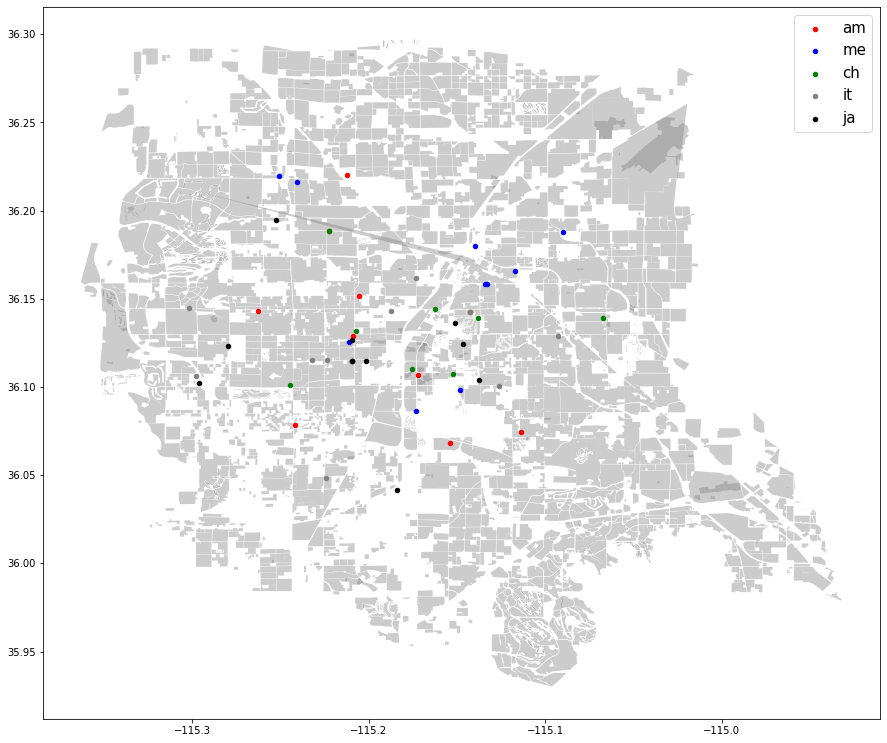

In [71]:
fig, ax = plt.subplots()
landuse_map.plot(ax=ax,alpha=0.4,color="grey")
geo_am_st.plot(ax=ax,markersize=20,color="red",marker="o",label="am")
geo_me_st.plot(ax=ax,markersize=20,color="blue",marker="o",label="me")
geo_ch_st.plot(ax=ax,markersize=20,color="green",marker="o",label="ch")
geo_it_st.plot(ax=ax,markersize=20,color="grey",marker="o",label="it")
geo_ja_st.plot(ax=ax,markersize=20,color="black",marker="o",label="ja")
plt.legend(prop={'size':15})

# 3.8 Map of Top 10 Restaurants By Review Count For Each Cuisine


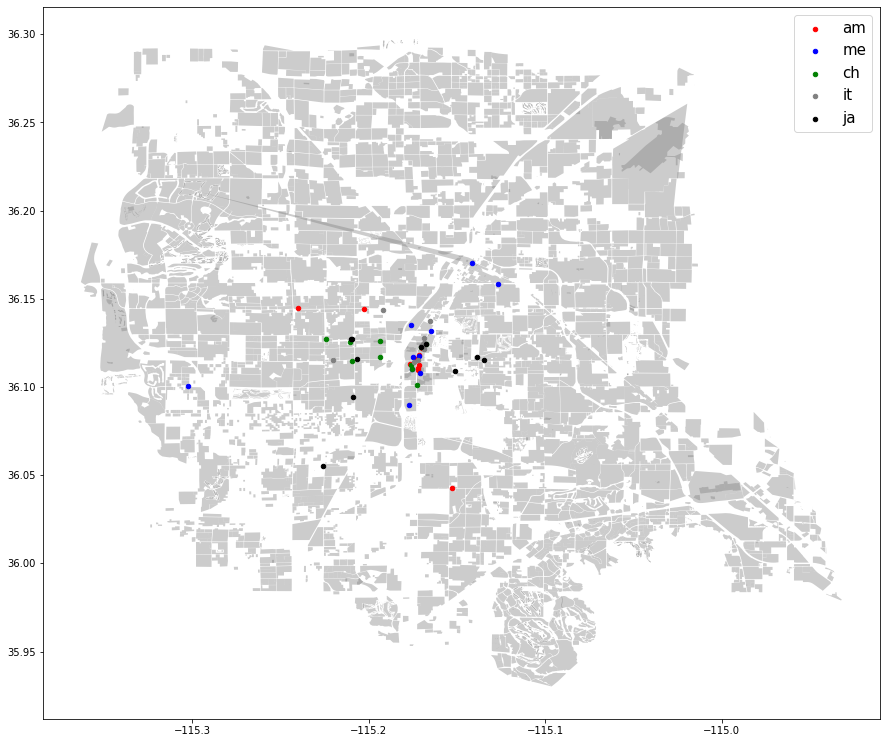

In [72]:
fig, ax = plt.subplots()
landuse_map.plot(ax=ax,alpha=0.4,color="grey")
geo_am_re.plot(ax=ax,markersize=20,color="red",marker="o",label="am")
geo_me_re.plot(ax=ax,markersize=20,color="blue",marker="o",label="me")
geo_ch_re.plot(ax=ax,markersize=20,color="green",marker="o",label="ch")
geo_it_re.plot(ax=ax,markersize=20,color="grey",marker="o",label="it")
geo_ja_re.plot(ax=ax,markersize=20,color="black",marker="o",label="ja")
plt.legend(prop={'size':15})

#  Let's try to plot interactive maps for best restaurants using Folium library:

In [73]:
import os 
import folium
from folium import plugins
import rasterio as rio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import earthpy as et

In [74]:
def plot_markers(cuisine,color):
    locations_cuisine = cuisine[['latitude', 'longitude']]
    locationlist_cuisine = locations_cuisine.values.tolist()
    for point in range(0, 10):
        folium.CircleMarker(
            location=locationlist_cuisine[point],
            popup="food",
            radius=3,
            fill=True,
            fill_color=color,
                color=color,
            fill_opacity=0.3
        ).add_to(m)
        #folium.Marker((locationlist_cuisine[point]),icon=folium.Icon(color=color, icon_color='white', icon='female', angle=0, prefix='fa')).add_to(m)
       

In [75]:
# m = folium.Map(location=[40.0150, -105.2705])
m = folium.Map(location=[36.10, -115.1980],zoom_start=11)

plot_markers(am_re,'red')
plot_markers(me_re,'yellow')
plot_markers(ch_re,'blue')
plot_markers(it_re,'black')
plot_markers(ja_re,'green')

In [88]:
m

# Star Rating Distribution

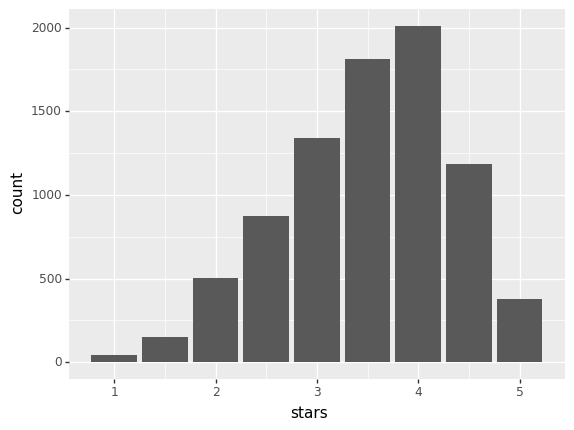

<ggplot: (-9223371848370999812)>

In [77]:
ggplot(vegas_food,aes(x='stars')) + \
    geom_bar(stat = 'count')

In [86]:
m = folium.Map(location=[36.10, -115.1980],zoom_start=11)

plot_markers(am_st,'red')
plot_markers(me_st,'yellow')
plot_markers(ch_st,'blue')
plot_markers(it_st,'black')
plot_markers(ja_st,'green')

legend_html =   '''
                <div style="position: fixed; 
                            bottom: 50px; left: 50px; width: 120px; height: 200px; 
                            border:2px solid grey; z-index:9999; font-size:14px;
                            ">&nbsp; Cool Legend <br>
                              &nbsp; American &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i><br>
                              &nbsp; Mexican &nbsp; <i class="fa fa-map-marker fa-2x" style="color:yellow"></i><br>
                              &nbsp; Chinese &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i><br>
                              &nbsp; Italian &nbsp; <i class="fa fa-map-marker fa-2x" style="color:black"></i><br>
                              &nbsp; Japanese &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i>
                </div>
                ''' 

m.get_root().html.add_child(folium.Element(legend_html))

In [87]:
m

The top restaurants with highest star ratings are more dispersed over Las Vegas than those with high review counts. The lack of overlap between these two suggest that, interestingly, high star ratings don’t have a strong correlation to high review counts. If a place is popular because the food is great, one can assume that it would have high star ratings and consequently attract more reviews. These two criteria intuitively seem to complement and feed off of each other. However, the data suggests otherwise. Looking at the tables of top restaurants by review count, one can see that the average star rating of these top restaurants is between 3.5 to 4 stars, which is rather mediocre. This could imply that as a restaurant attracts more reviews, the star rating tend to get pulled down. This is possibly due to the sheer diversity of people with differing tastes reviewing the same place, thus making a place more “controversial”. From this, we can also intuitively hypothesize that in the particular situation if a restaurant has a high review count and a low star rating, the star rating is more negligible. That being said, the data is not sufficient enough to affirm the hypothesis.

# Conclusion:-

This exploratory data analysis of the restaurants in Las Vegas has resulted in many interesting insights. For one, the top 5 most frequent cuisines in Las Vegas are American, Mexican, Chinese, Italian, and Japanese in that respective order. For each cuisine, we were able to find the 10 best restaurants both in terms of highest star ratings and review counts. This report lists the information for these top restaurants in table form, which is great for readers to take note of the next time they visit Las Vegas and would like a data-science verified list of “best” restaurants to eat at. Last but not least, comparing the top restaurant lists given by highest rating versus highest review counts resulted in the observation that the two criteria don’t appear to show strong correlation to each other. Restaurants with high review counts tended to have lower star ratings between 3.5-4. It has been great fun and a pleasure conducting this analysis. I would love to read your comments on the analysis, areas of improvement, and further analyses that could be possible with this data.